In [76]:
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Point

In [23]:
pts1 = [Point(0,0), Point(1, 0), Point(2, 0), Point(3, 0)]
df1 = gpd.GeoDataFrame([1, 2, 3, 4], geometry=pts1)

In [24]:
df1.geometry = df1.buffer(.5, 1)

<AxesSubplot:>

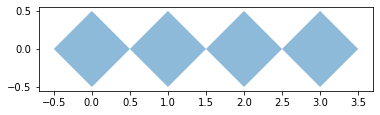

In [25]:
df1.plot(alpha=.5)

In [124]:
pts2 = [Point(0.6, 0), Point(1.6, 0), Point(2.6, 0), Point(6.6, 0)]
df2 = gpd.GeoDataFrame(geometry=pts2)
df2.geometry = df2.buffer(.5)

<AxesSubplot:>

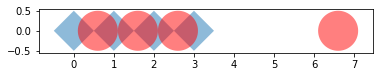

In [125]:
ax = df1.plot(alpha=.5)
df2.plot(ax=ax, alpha=.5, color='r')

In [36]:
df2_ix, df1_ix = df1.sindex.query_bulk(df2.geometry, predicate='intersects')

In [48]:
areas = df2.geometry.values[df2_ix].intersection(df1.geometry.values[df1_ix]).area
areas

array([0.13061596, 0.2714526 , 0.13061596, 0.2714526 , 0.13061596,
       0.2714526 , 0.13061596])

In [37]:
df2_ix

array([0, 0, 1, 1, 2, 2, 3])

In [43]:
df1_ix

array([0, 1, 1, 2, 2, 3, 3])

In [57]:
main = []
for i in range(len(df2)):
    mask = df2_ix == i
    main.append(df1_ix[mask][np.argmax(areas[mask])])

CPU times: user 231 µs, sys: 0 ns, total: 231 µs
Wall time: 193 µs


In [62]:
df2['values'] = 

In [65]:
np.argmax([0, 1, 1])

1

In [116]:
def area_max(source_df, target_df, variables):
    """
    Join attributes from source based on the largest intersection. In case of a tie it picks the first one.
    
    Parameters
    ----------
    source_df : GeoDataFrame
        GeoDataFrame containing source values
    target_df : GeoDataFrame
        GeoDataFrame containing source values
    variables : string or list-like
        column(s) in dataframes for variable(s)
    
    Returns
    -------
    GeoDataFrame
    """    
    target_df = target_df.copy()
    target_ix, source_ix = source_df.sindex.query_bulk(target_df.geometry, predicate='intersects')
    areas = target_df.geometry.values[target_ix].intersection(source_df.geometry.values[source_ix]).area

    main = []
    for i in range(len(target_df)):
        mask = target_ix == i
        if np.any(mask):
            main.append(source_ix[mask][np.argmax(areas[mask])])
        else:
            main.append(np.nan)
    
    main = np.array(main)
    mask = ~np.isnan(main)
    if pd.api.types.is_list_like(variables):
        for v in variables:
            arr = np.empty(len(main), dtype=object)
            arr[:] = np.nan
            arr[mask] = source_df[v].values[main[mask].astype(int)]
            target_df[v] = arr
    else:
        arr = np.empty(len(main), dtype=object)
        arr[:] = np.nan
        arr[mask] = source_df[variables].values[main[mask].astype(int)]
        target_df[variables] = arr
        
    return target_df

In [128]:
area_max(df1, df2, 0)[0].astype(df1[0].dtype)

ValueError: cannot convert float NaN to integer

In [97]:
main = np.array([1, 0, np.nan])

In [111]:
df2['values'].dtype

dtype('int64')

In [118]:
arr = np.empty(len(df2), dtype=object)
arr[:] = np.nan

In [120]:
arr[1] = 'tr'

In [104]:
mask = ~np.isnan(main)
arr[mask] = df2['values'].values[main[mask].astype(int)]

In [121]:
arr

array([nan, 'tr', nan, nan], dtype=object)